In [49]:
# Table for Pressure to Wind for Northwest Pacific
# JMA Typhoon scale
# THIS IS UNOFFICIAL !

# Uses wind pressure relationship from:
# Atkinson and Holliday (1977)
# https://journals.ametsoc.org/view/journals/mwre/105/4/1520-0493_1977_105_0421_tcmslp_2_0_co_2.xml?tab_body=pdf

import numpy as np
import pandas as pd

# Define the wind-pressure relationship formula (hPa to kt)
def jma_wind_pressure(mslp):
    # kt
    return 6.7 * ((1010 - mslp) ** 0.644)
    # m/s
    #return 3.4 * ((1010 - mslp) ** 0.644)

# Generate the list of pressures from 850 to 1010 hPa (850 being a theoretical min. for NWP?)
pressures = np.arange(850, 1011)

# Calculate the corresponding wind speeds (kt)
wind_speeds = [jma_wind_pressure(p) for p in pressures]

# Define the bins for JMA's intensity scale
bins = [
    {"name": "Violent typhoon", "min_wind": 105, "max_wind": 500},
    {"name": "Very strong typhoon", "min_wind": 85, "max_wind": 104},
    {"name": "Typhoon", "min_wind": 64, "max_wind": 84},
    {"name": "Severe tropical storm", "min_wind": 48, "max_wind": 63},
    {"name": "Tropical storm", "min_wind": 34, "max_wind": 47},
    {"name": "Tropical depression", "min_wind": 0, "max_wind": 33}
]

# Create the DataFrame for each bin
dfs = []
for bin in bins:
    min_wind = bin["min_wind"]
    max_wind = bin["max_wind"]
    min_mslp = np.inf
    max_mslp = -np.inf
    min_v_kt = np.inf
    max_v_kt = -np.inf
    
    for p, v in zip(pressures, wind_speeds):
        if min_wind <= v <= max_wind:
            min_mslp = min(min_mslp, p)
            max_mslp = max(max_mslp, p)
            min_v_kt = min(min_v_kt, v)
            max_v_kt = max(max_v_kt, v)
    
    # Convert wind speeds to other units

    min_v_m_s = max_v_kt / 1.94384
    max_v_m_s = max_v_kt / 1.94384
    min_v_km_h = max_v_kt * 1.852
    max_v_km_h = max_v_kt * 1.852
    min_v_mph = max_v_kt * 1.15078
    max_v_mph = max_v_kt * 1.15078
    
    # Create the DataFrame
    df = pd.DataFrame({
        "Category": [bin["name"]],
        "MSLP (hPa)": [f"{min_mslp:6.1f} - {max_mslp:6.1f}"],
        "V (m/s)": [f"{min_v_m_s:4.1f} - {max_v_m_s:4.1f}"],
        "V (km/h)": [f"{min_v_km_h:6.1f} - {max_v_km_h:6.1f}"],
        "V (kt)": [f"{min_v_kt:5.1f} - {max_v_kt:5.1f}"],
        "V (mph)": [f"{min_v_mph:5.1f} - {max_v_mph:5.1f}"]
    })
    dfs.append(df)
    
all_df = pd.concat(dfs).reset_index(drop=True)
print("Northwest Pacific Pressure to Wind for Typhoons using Atkinson and Holliday (1977)")
print("On the JMA Typhoon scale")
print(all_df.to_string(line_width=1000, index=False, col_space=15))

Northwest Pacific Pressure to Wind for Typhoons using Atkinson and Holliday (1977)
On the JMA Typhoon scale
             Category      MSLP (hPa)         V (m/s)        V (km/h)          V (kt)         V (mph)
      Violent typhoon  850.0 -  938.0     90.5 - 90.5  326.0 -  326.0   105.2 - 176.0   202.5 - 202.5
  Very strong typhoon  940.0 -  958.0     53.2 - 53.2  191.4 -  191.4    85.3 - 103.4   118.9 - 118.9
              Typhoon  960.0 -  976.0     42.8 - 42.8  154.1 -  154.1    64.9 -  83.2    95.8 -  95.8
Severe tropical storm  978.0 -  988.0     32.1 - 32.1  115.6 -  115.6    49.0 -  62.4    71.8 -  71.8
       Tropical storm  990.0 -  997.0     23.7 - 23.7   85.4 -   85.4    35.0 -  46.1    53.1 -  53.1
  Tropical depression  999.0 - 1010.0     16.1 - 16.1   58.1 -   58.1     0.0 -  31.4    36.1 -  36.1


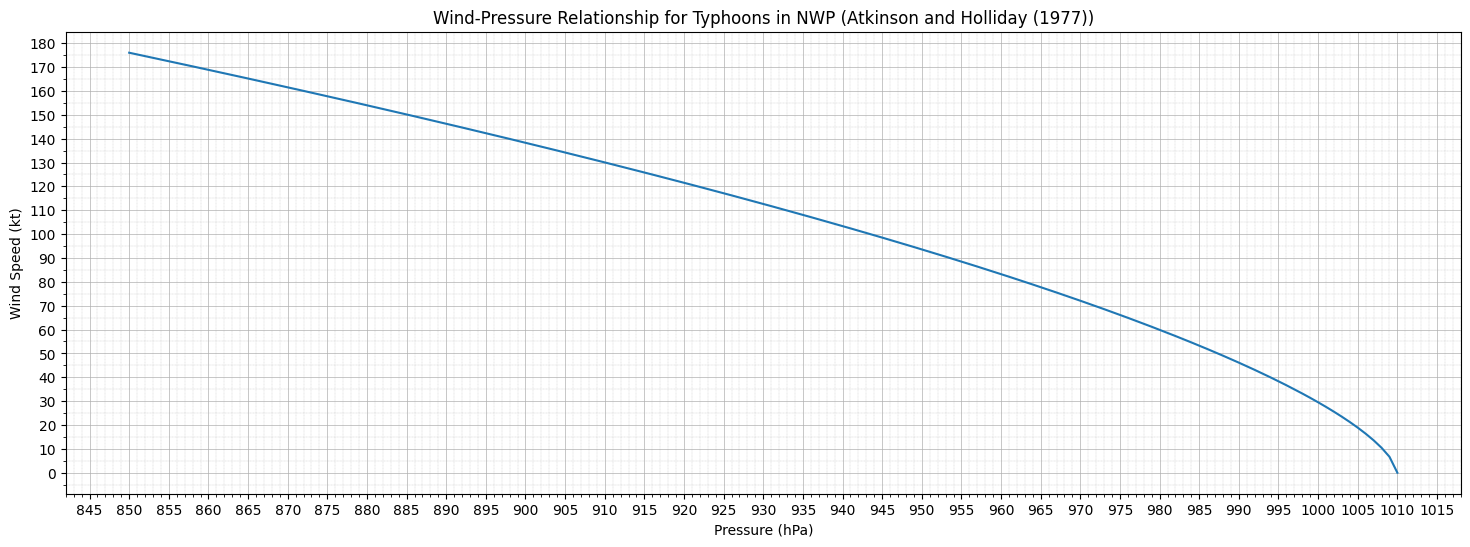

In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create the DataFrame
df = pd.DataFrame({
    "Pressure (hPa)": pressures,
    "Wind Speed (kt)": wind_speeds
})


# Plot the chart
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df["Pressure (hPa)"], df["Wind Speed (kt)"])
ax.set_xlabel("Pressure (hPa)")
ax.set_ylabel("Wind Speed (kt)")
ax.set_title("Wind-Pressure Relationship for Typhoons in NWP (Atkinson and Holliday (1977))")

# Set grid lines
ax.grid(True, which='major', linestyle='-', linewidth=0.5)
ax.grid(True, which='minor', linestyle='--', linewidth=0.2)


# Set tick intervals
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  # major ticks every 5 hPa
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))  # minor ticks every 1 hPa
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))  # major ticks every 10 kt
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))  # minor ticks every 5 kt

plt.show()

In [63]:
# Print the DataFrame without the index column
print("Northwest Pacific Wind Pressure Relationship for Typhoons using Atkinson and Holliday (1977)")
print(df.to_string(index=False))

Northwest Pacific Wind Pressure Relationship for Typhoons using Atkinson and Holliday (1977)
 Pressure (hPa)  Wind Speed (kt)
            850       176.006243
            851       175.297027
            852       174.586222
            853       173.873813
            854       173.159787
            855       172.444130
            856       171.726828
            857       171.007865
            858       170.287227
            859       169.564899
            860       168.840867
            861       168.115114
            862       167.387625
            863       166.658384
            864       165.927375
            865       165.194581
            866       164.459985
            867       163.723572
            868       162.985323
            869       162.245220
            870       161.503247
            871       160.759384
            872       160.013614
            873       159.265918
            874       158.516276
            875       157.764669
            876 